Import Libraries

In [6]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks 


Load PPG Data

In [ ]:
# Step 2: Load the dataset 
data = pd.read_csv('E:\Downloads\s10_run.csv')

# Show the first few rows to ensure it loaded correctly
data.head()


,time,ecg,peaks,pleth_1,pleth_2,pleth_3,pleth_4,pleth_5,pleth_6,lc_1,lc_2,temp_1,temp_2,temp_3,a_x,a_y,a_z,g_x,g_y,g_z
0,2021-01-01 11:22:48.305804,33664,0,65589,69333,3164,90553,103093,5652,6297684,6497440,33.56,35.13,32.762062,9.849649,-6.802872,-3.593880,1.154780,0.162031,-1.012268
1,2021-01-01 11:22:48.307804,33866,0,65589,69333,3164,90558,103077,5647,6297684,6497440,33.56,35.13,32.771049,9.855037,-6.833998,-3.630393,1.149587,0.175879,-1.005211
2,2021-01-01 11:22:48.309804,34155,0,65595,69334,3181,90544,103098,5660,6297798,6492958,33.56,35.25,32.774044,9.861621,-6.848364,-3.741729,1.137070,0.198783,-0.985370
3,2021-01-01 11:22:48.311804,34366,0,65591,69349,3175,90544,103098,5660,6297798,6492958,33.56,35.25,32.774044,9.861621,-6.848364,-3.741729,1.137070,0.198783,-0.985370
4,2021-01-01 11:22:48.313804,34538,0,65583,69343,3186,90554,103093,5651,6297798,6492958,33.56,35.25,32.777039,9.877184,-6.873505,-3.763278,1.129213,0.206506,-0.972453


Extract Relevant

In [8]:
# Extract relevant columns
time = pd.to_datetime(data['time'])
ecg = data['ecg']
pleth = data[['pleth_1', 'pleth_2', 'pleth_3', 'pleth_4', 'pleth_5', 'pleth_6']]

# Display the extracted columns
print("Time:", time.head())
print("ECG:", ecg.head())
print("Pleth:", pleth.head())


Time: 0   2021-01-01 11:22:48.305804
1   2021-01-01 11:22:48.307804
2   2021-01-01 11:22:48.309804
3   2021-01-01 11:22:48.311804
4   2021-01-01 11:22:48.313804
Name: time, dtype: datetime64[ns]
ECG: 0    33664
1    33866
2    34155
3    34366
4    34538
Name: ecg, dtype: int64
Pleth:    pleth_1  pleth_2  pleth_3  pleth_4  pleth_5  pleth_6
0    65589    69333     3164    90553   103093     5652
1    65589    69333     3164    90558   103077     5647
2    65595    69334     3181    90544   103098     5660
3    65591    69349     3175    90544   103098     5660
4    65583    69343     3186    90554   103093     5651


Calculate Statistical Features

In [9]:
# Function to calculate statistical features for PPG signals
def calculate_statistical_features(pleth_signal):
    features = {}
    for i in range(pleth_signal.shape[1]):
        signal = pleth_signal.iloc[:, i]
        features[f'pleth_{i + 1}'] = {
            'mean': np.mean(signal),
            'median': np.median(signal),
            'mode': signal.mode()[0],  # Using the first mode in case of multiple modes
            'std_dev': np.std(signal)
        }
    return pd.DataFrame(features)

# Calculate features
statistical_features = calculate_statistical_features(pleth)

# Display the calculated features
statistical_features


,pleth_1,pleth_2,pleth_3,pleth_4,pleth_5,pleth_6
mean,64789.504940,66658.713972,3371.902358,90909.679105,102872.013101,5930.212096
median,64766.000000,66587.000000,3375.000000,90938.000000,102891.000000,5939.000000
mode,64583.000000,65920.000000,3411.000000,90970.000000,103221.000000,5913.000000
std_dev,400.341738,1348.538883,96.272787,169.333787,415.090266,151.723615


 Define Abnormality Detection Function

In [10]:
# Function to detect abnormalities in PPG signal
def detect_abnormalities(pleth_signal):
    abnormal_indices = []
    for i in range(pleth_signal.shape[1]):
        # Find peaks in the PPG signal with a threshold
        signal = pleth_signal.iloc[:, i]
        peaks, _ = find_peaks(signal, height=np.mean(signal) + 2 * np.std(signal))  # Example threshold
        abnormal_indices.extend(peaks)
    return abnormal_indices


Detect Abnormalities in PPG Signals

In [11]:
# Detect abnormalities in the PPG signals
abnormal_peaks_indices = detect_abnormalities(pleth)

# Display detected abnormal peak indices
print("Detected Abnormal Peak Indices:", abnormal_peaks_indices)


Detected Abnormal Peak Indices: [np.int64(2), np.int64(7), np.int64(10), np.int64(17), np.int64(22), np.int64(27), np.int64(29), np.int64(32), np.int64(35), np.int64(40), np.int64(43), np.int64(45), np.int64(48), np.int64(51), np.int64(54), np.int64(59), np.int64(63), np.int64(66), np.int64(68), np.int64(74), np.int64(78), np.int64(83), np.int64(86), np.int64(89), np.int64(100), np.int64(105), np.int64(110), np.int64(116), np.int64(122), np.int64(126), np.int64(131), np.int64(133), np.int64(137), np.int64(141), np.int64(143), np.int64(154), np.int64(164), np.int64(166), np.int64(180), np.int64(420), np.int64(425), np.int64(428), np.int64(433), np.int64(440), np.int64(693), np.int64(695), np.int64(698), np.int64(701), np.int64(704), np.int64(708), np.int64(713), np.int64(717), np.int64(722), np.int64(2080), np.int64(2085), np.int64(2089), np.int64(2095), np.int64(2098), np.int64(2101), np.int64(2108), np.int64(2117), np.int64(2119), np.int64(2122), np.int64(2276), np.int64(2281), np.int

Visualize the Results

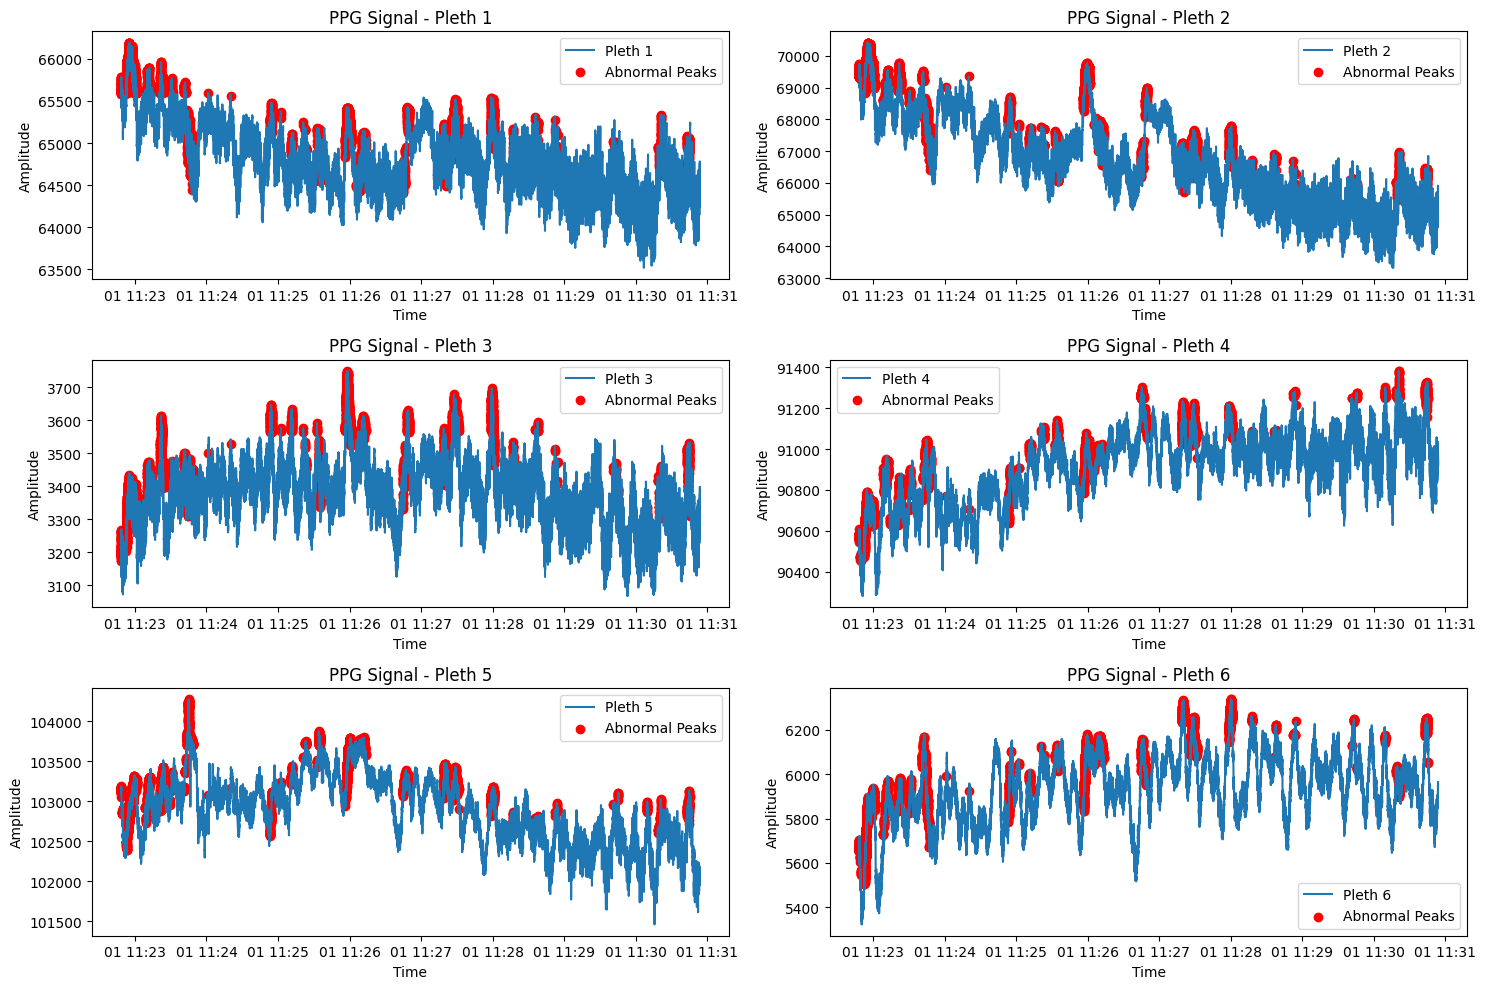

In [13]:
# Visualize the PPG signals and detected abnormalities
plt.figure(figsize=(15, 10))
for i in range(pleth.shape[1]):
    plt.subplot(3, 2, i + 1)
    plt.plot(time, pleth.iloc[:, i], label=f'Pleth {i + 1}')
    plt.scatter(time[abnormal_peaks_indices], pleth.iloc[abnormal_peaks_indices, i], color='red', label='Abnormal Peaks')
    plt.title(f'PPG Signal - Pleth {i + 1}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
plt.tight_layout()
plt.show()


 Save Results to CSV

In [14]:
# Save the results to a new DataFrame and export to CSV
results = pd.DataFrame({
    'time': time[abnormal_peaks_indices],
    'abnormal_peak_index': abnormal_peaks_indices,
})

# Save results to a CSV file
results.to_csv('abnormal_peaks_results.csv', index=False)

print("Abnormal peaks results saved to 'abnormal_peaks_results.csv'")


Abnormal peaks results saved to 'abnormal_peaks_results.csv'
